In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## 회귀모델 사례

In [4]:
# 예제 데이터 생성: 선형, 비선형, 랜덤한 관계
np.random.seed(42)

# 1. 선형 관계 데이터 생성
X_linear = np.random.rand(100, 1) * 10  # X는 0~10 사이의 값
y_linear = 3 * X_linear + 5 + np.random.randn(100, 1) * 2  # y = 3*X + 5 + 노이즈

# 2. 비선형 관계 데이터 생성
X_nonlinear = np.random.rand(100, 1) * 10
y_nonlinear = X_nonlinear ** 2 + np.random.randn(100, 1) * 10  # y = X^2 + 노이즈

# 3. 랜덤한 관계 데이터 생성
X_random = np.random.rand(100, 1) * 10
y_random = np.random.rand(100, 1) * 100  # y는 완전히 랜덤

# 모든 데이터를 결합하여 하나의 DataFrame으로 구성
data_linear = pd.DataFrame(np.hstack((X_linear, y_linear)), columns=["X", "y_linear"])
data_nonlinear = pd.DataFrame(np.hstack((X_nonlinear, y_nonlinear)), columns=["X", "y_nonlinear"])
data_random = pd.DataFrame(np.hstack((X_random, y_random)), columns=["X", "y_random"])

# 훈련 및 테스트 데이터로 분리
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(data_linear[["X"]], data_linear["y_linear"], test_size=0.2, random_state=42)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(data_nonlinear[["X"]], data_nonlinear["y_nonlinear"], test_size=0.2, random_state=42)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(data_random[["X"]], data_random["y_random"], test_size=0.2, random_state=42)

# 모델 초기화
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 성능 비교를 위한 함수 정의
def evaluate_model(model, X_train, X_test, y_train, y_test, label):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    return {
        "Model": label,
        "Train MSE": mse_train,
        "Test MSE": mse_test,
        "Train R2": r2_train,
        "Test R2": r2_test
    }

# 각 모델에 대해 선형, 비선형, 랜덤 데이터에서 성능 평가
results = []

# 선형 데이터
results.append(evaluate_model(lin_reg, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Linear Regression (Linear Data)"))
results.append(evaluate_model(tree_reg, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Decision Tree (Linear Data)"))
results.append(evaluate_model(forest_reg, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Random Forest (Linear Data)"))

# 비선형 데이터
results.append(evaluate_model(lin_reg, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Linear Regression (Nonlinear Data)"))
results.append(evaluate_model(tree_reg, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Decision Tree (Nonlinear Data)"))
results.append(evaluate_model(forest_reg, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Random Forest (Nonlinear Data)"))

# 랜덤 데이터
results.append(evaluate_model(lin_reg, X_train_random, X_test_random, y_train_random, y_test_random, "Linear Regression (Random Data)"))
results.append(evaluate_model(tree_reg, X_train_random, X_test_random, y_train_random, y_test_random, "Decision Tree (Random Data)"))
results.append(evaluate_model(forest_reg, X_train_random, X_test_random, y_train_random, y_test_random, "Random Forest (Random Data)"))

# 결과를 DataFrame으로 변환하여 시각적으로 보기
results_df = pd.DataFrame(results)
print(results_df)


                                Model   Train MSE     Test MSE  Train R2  \
0     Linear Regression (Linear Data)    3.390715     2.614798  0.955206   
1         Decision Tree (Linear Data)    0.000000     3.587792  1.000000   
2         Random Forest (Linear Data)    0.660085     2.971226  0.991280   
3  Linear Regression (Nonlinear Data)  124.919456   199.141082  0.866767   
4      Decision Tree (Nonlinear Data)    0.000000   119.879399  1.000000   
5      Random Forest (Nonlinear Data)   18.052617    97.803606  0.980746   
6     Linear Regression (Random Data)  780.984020   565.504859  0.001666   
7         Decision Tree (Random Data)    0.000000  1814.781291  1.000000   
8         Random Forest (Random Data)  174.738617  1184.547996  0.776631   

    Test R2  
0  0.968635  
1  0.956963  
2  0.964359  
3  0.849911  
4  0.909649  
5  0.926287  
6 -0.007081  
7 -2.231857  
8 -1.109505  


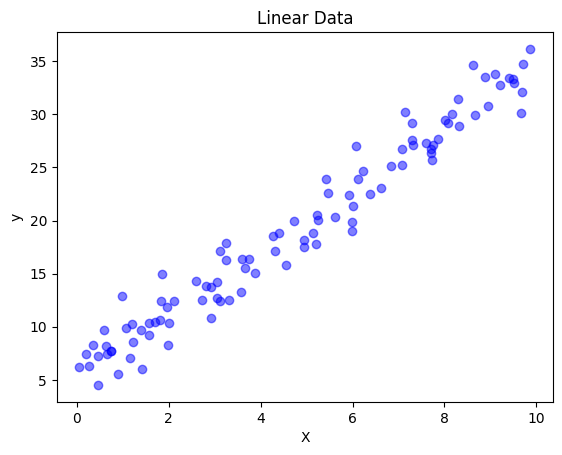

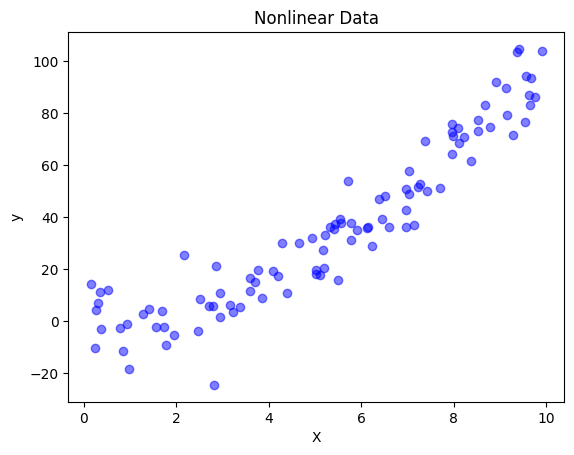

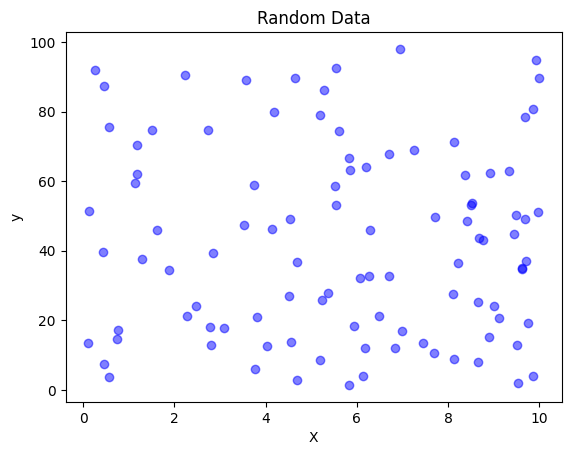

In [5]:
import matplotlib.pyplot as plt

# 데이터 시각화를 위한 함수 정의
def plot_data(X, y, title):
    plt.scatter(X, y, color='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

# 선형 데이터 시각화
plot_data(X_linear, y_linear, "Linear Data")

# 비선형 데이터 시각화
plot_data(X_nonlinear, y_nonlinear, "Nonlinear Data")

# 랜덤 데이터 시각화
plot_data(X_random, y_random, "Random Data")

In [6]:
#시각화 함수
def plot_data_with_predictions(X, y ,model, title):
    plt.scatter(X,y, color='blue',alpha=0.5, label='True ')
    X_range = np.linspace(X.min(),X.max(), 100).reshape(-1,1)
    y_pred = model.predict(X_range)
    plt.plot(X_range, y_pred, color='red',label='Prediciton Line')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [7]:
def train_and_plot(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    plot_data_with_predictions(X_test, y_test, model, label)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


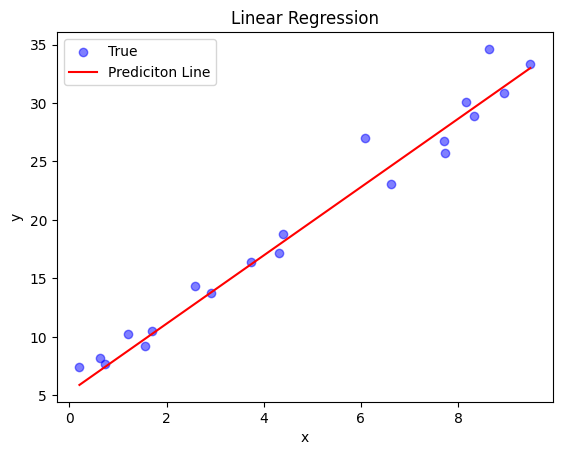

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


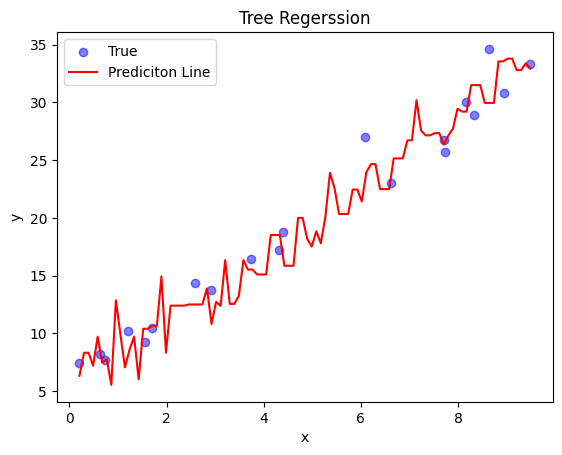

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


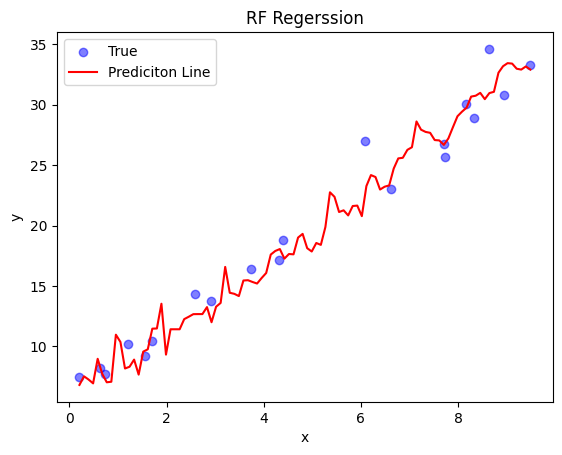

In [10]:
train_and_plot(lin_reg,X_train_linear,y_train_linear, X_test_linear, y_test_linear, 'Linear Regression')
train_and_plot(tree_reg,X_train_linear,y_train_linear, X_test_linear, y_test_linear, 'Tree Regerssion')
train_and_plot(forest_reg,X_train_linear,y_train_linear, X_test_linear, y_test_linear, 'RF Regerssion')

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


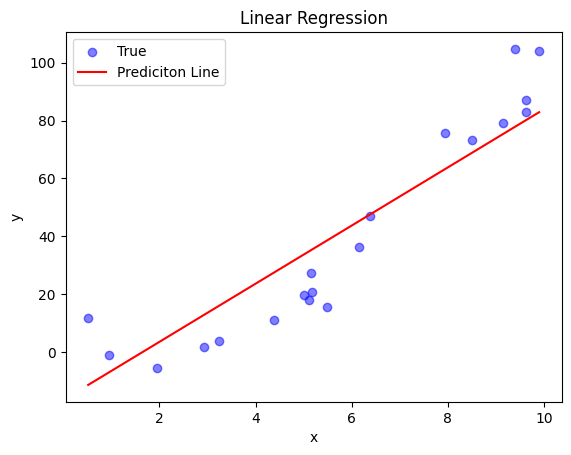

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


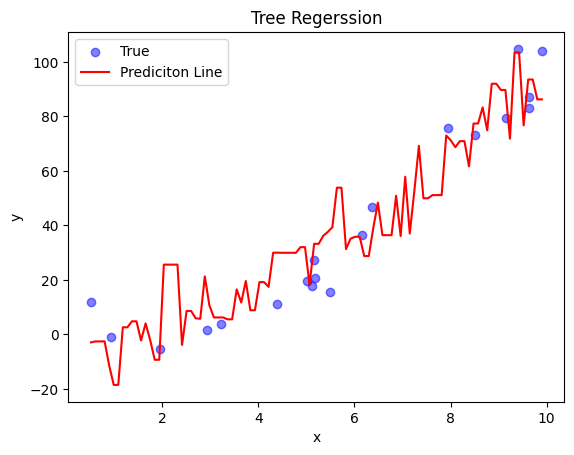

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


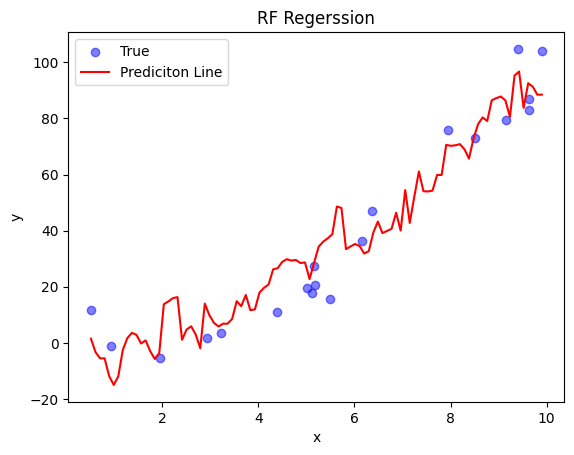

In [12]:
train_and_plot(lin_reg,X_train_nonlinear,y_train_nonlinear, X_test_nonlinear, y_test_nonlinear, 'Linear Regression')
train_and_plot(tree_reg,X_train_nonlinear,y_train_nonlinear, X_test_nonlinear, y_test_nonlinear, 'Tree Regerssion')
train_and_plot(forest_reg,X_train_nonlinear,y_train_nonlinear, X_test_nonlinear, y_test_nonlinear, 'RF Regerssion')

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


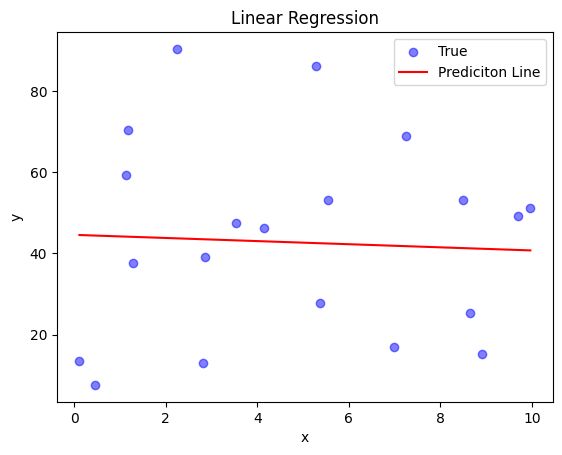

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


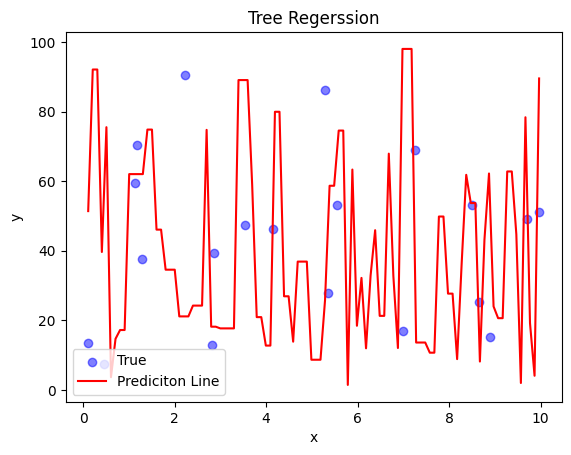

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


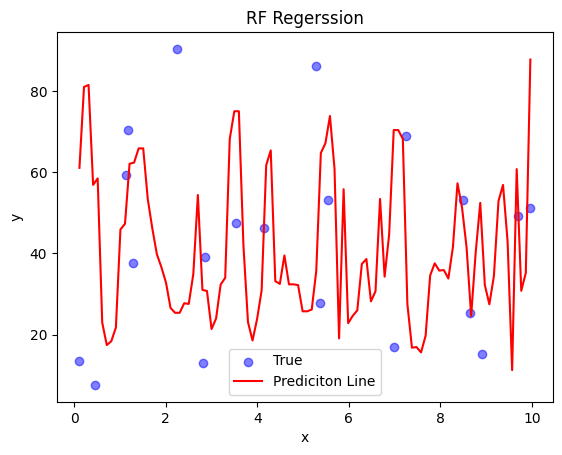

In [14]:
train_and_plot(lin_reg,X_train_random,y_train_random, X_test_random, y_test_random, 'Linear Regression')
train_and_plot(tree_reg,X_train_random,y_train_random, X_test_random, y_test_random, 'Tree Regerssion')
train_and_plot(forest_reg,X_train_random,y_train_random, X_test_random, y_test_random, 'RF Regerssion')

### 분류모델

- 선형적으로 구분이 가능한 데이터셋
- 비선형적으로 구분이 가능한 데이터셋
- 랜덤한 데이터셋 ( 구분이 어려운 데이터셋 )
- 로지스틱, DT, RF, SVC
    - 어떤 식으로 모델이 분류하는지?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# 1. 데이터 생성
# 선형적으로 구분 가능한 데이터 (선형적으로 잘 나뉘는 데이터)
X_linear, y_linear = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42, cluster_std=1.5)

# 비선형적으로 구분 가능한 데이터 (moons 데이터셋: 비선형적인 데이터 생성)
X_nonlinear, y_nonlinear = make_moons(n_samples=200, noise=0.2, random_state=42)

# 랜덤 데이터 (구분이 어려운 랜덤 데이터)
X_random, y_random = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42, flip_y=0.5)

In [20]:
# 2. 훈련 및 테스트 데이터로 분리
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

# 3. 모델 초기화
log_reg = LogisticRegression()
tree_clf = DecisionTreeClassifier(random_state=42)
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', random_state=42)


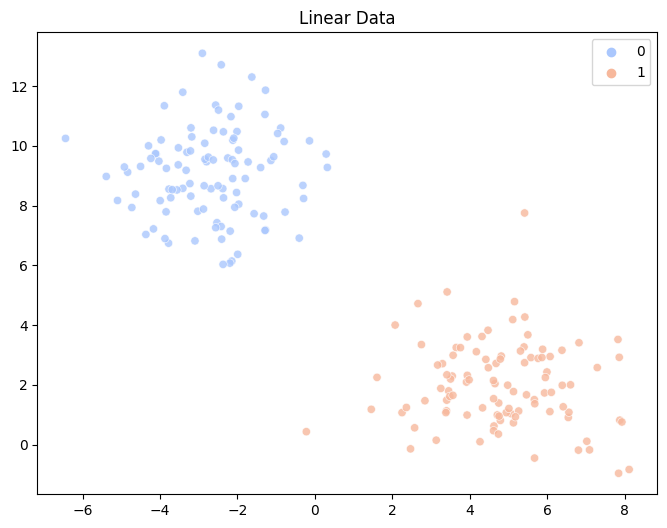

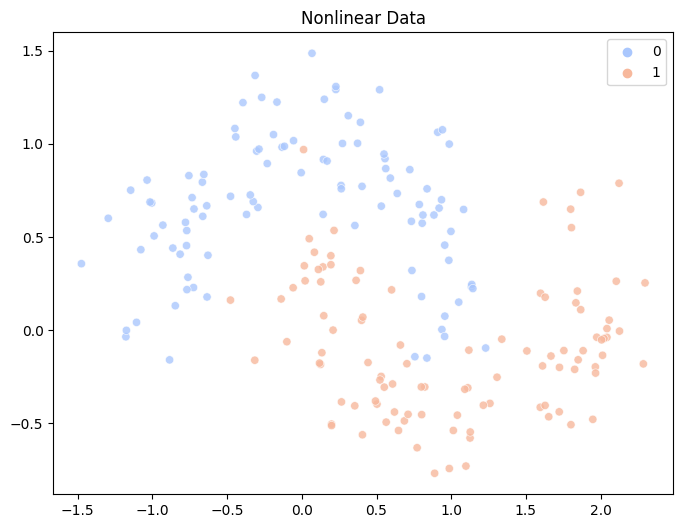

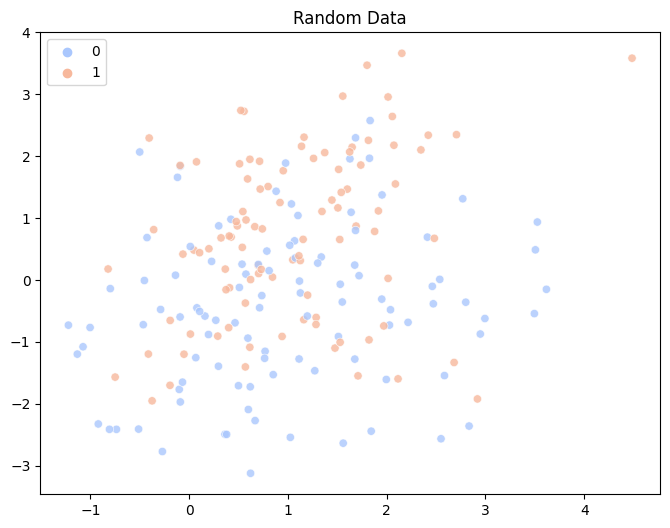

Logistic Regression (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



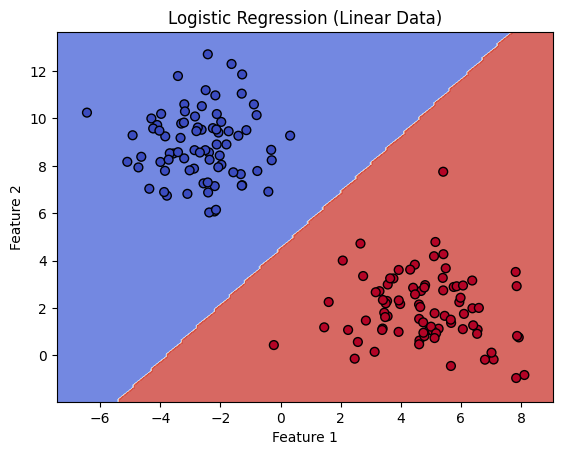

Decision Tree (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



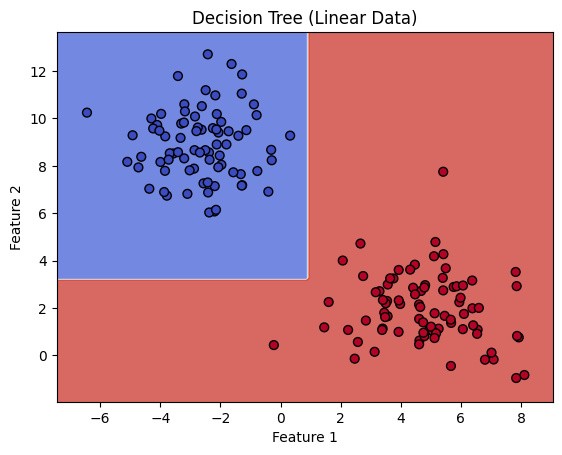

Random Forest (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



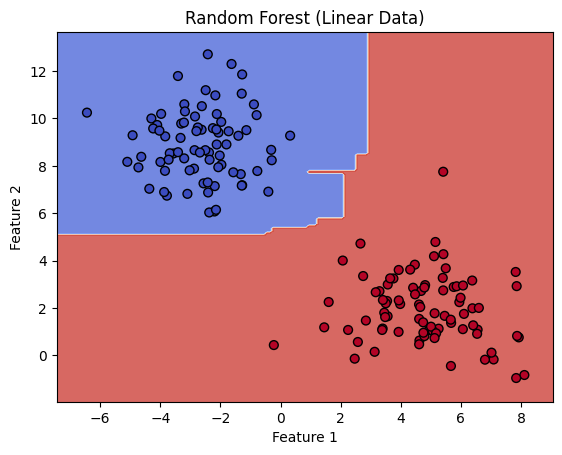

SVM (Linear Data) Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



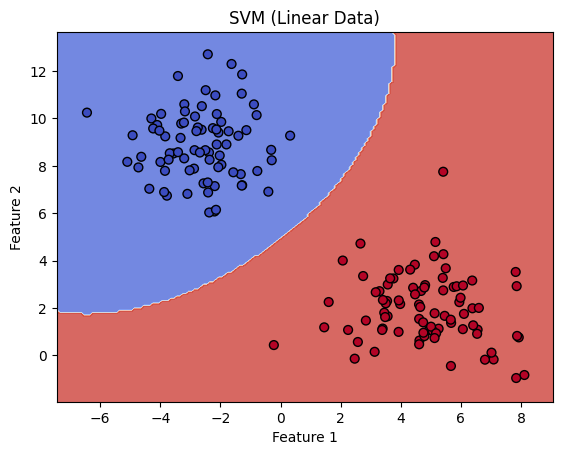

Logistic Regression (Nonlinear Data) Test Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.88      0.78      0.82        18

    accuracy                           0.85        40
   macro avg       0.85      0.84      0.85        40
weighted avg       0.85      0.85      0.85        40



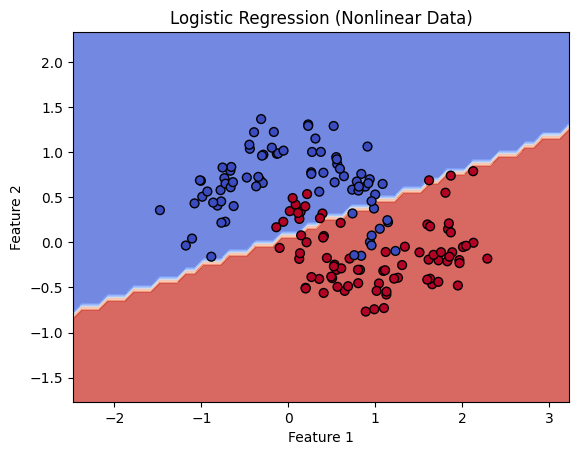

Decision Tree (Nonlinear Data) Test Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



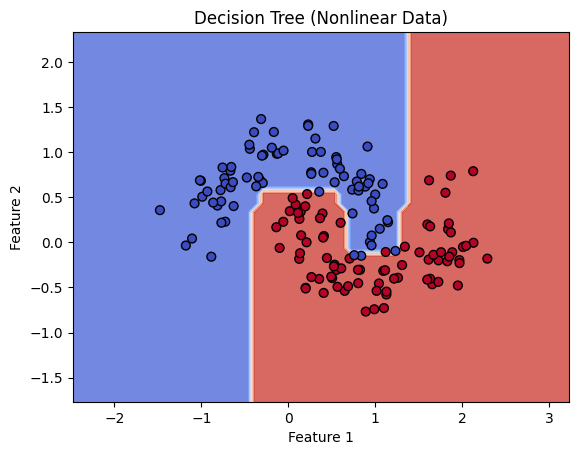

Random Forest (Nonlinear Data) Test Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.83      0.91        18

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



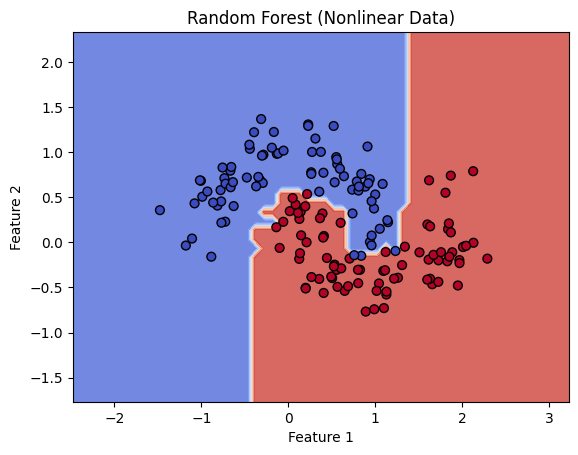

SVM (Nonlinear Data) Test Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



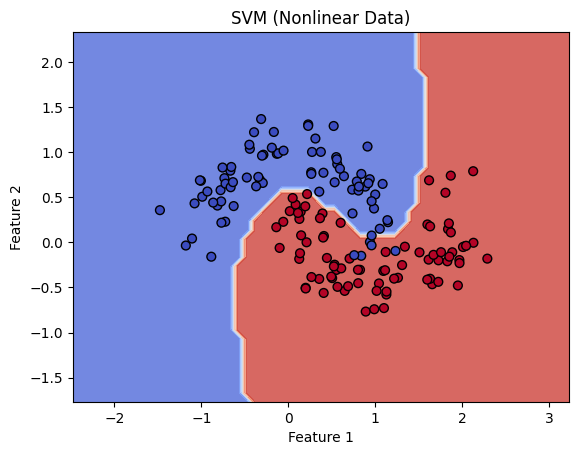

Logistic Regression (Random Data) Test Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.73      0.58      0.65        19

    accuracy                           0.70        40
   macro avg       0.71      0.69      0.69        40
weighted avg       0.71      0.70      0.70        40



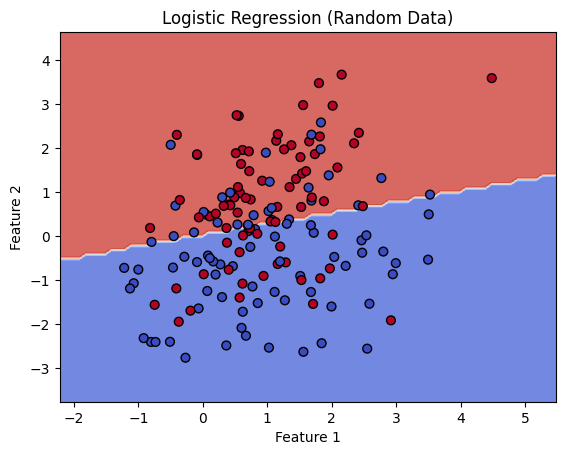

Decision Tree (Random Data) Test Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.43      0.47      0.45        19

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.45      0.45      0.45        40



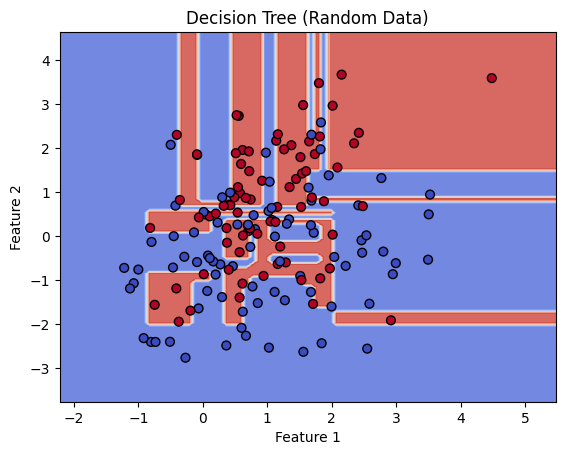

Random Forest (Random Data) Test Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.60      0.63      0.62        19

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.63      0.62      0.63        40



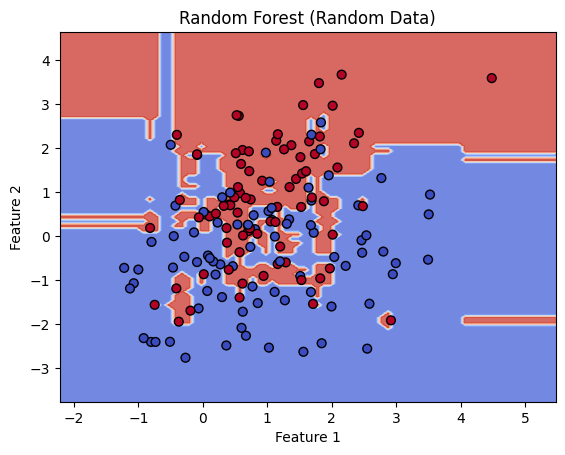

SVM (Random Data) Test Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.69      0.58      0.63        19

    accuracy                           0.68        40
   macro avg       0.68      0.67      0.67        40
weighted avg       0.68      0.68      0.67        40



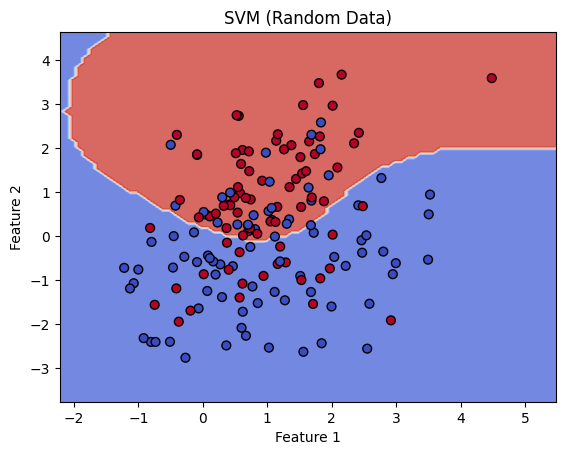

In [21]:
# 성능 평가 및 결정 경계 시각화 함수 정의
def evaluate_and_plot_decision_boundary(model, X_train, X_test, y_train, y_test, title):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    # 정확도 계산
    acc = accuracy_score(y_test, y_pred_test)
    print(f"{title} Test Accuracy: {acc}")

    # 분류 리포트 출력
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # 결정 경계 시각화
    plot_decision_boundary(model, X_train, y_train, title)

# 결정 경계를 시각화하는 함수
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 데이터 시각화 함수
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", alpha=0.8)
    plt.title(title)
    plt.show()

# 각 데이터 시각화
plot_data(X_linear, y_linear, "Linear Data")
plot_data(X_nonlinear, y_nonlinear, "Nonlinear Data")
plot_data(X_random, y_random, "Random Data")

# 선형 데이터
evaluate_and_plot_decision_boundary(log_reg, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Logistic Regression (Linear Data)")
evaluate_and_plot_decision_boundary(tree_clf, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Decision Tree (Linear Data)")
evaluate_and_plot_decision_boundary(forest_clf, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "Random Forest (Linear Data)")
evaluate_and_plot_decision_boundary(svm_clf, X_train_linear, X_test_linear, y_train_linear, y_test_linear, "SVM (Linear Data)")

# 비선형 데이터
evaluate_and_plot_decision_boundary(log_reg, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Logistic Regression (Nonlinear Data)")
evaluate_and_plot_decision_boundary(tree_clf, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Decision Tree (Nonlinear Data)")
evaluate_and_plot_decision_boundary(forest_clf, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "Random Forest (Nonlinear Data)")
evaluate_and_plot_decision_boundary(svm_clf, X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear, "SVM (Nonlinear Data)")

# 랜덤 데이터
evaluate_and_plot_decision_boundary(log_reg, X_train_random, X_test_random, y_train_random, y_test_random, "Logistic Regression (Random Data)")
evaluate_and_plot_decision_boundary(tree_clf, X_train_random, X_test_random, y_train_random, y_test_random, "Decision Tree (Random Data)")
evaluate_and_plot_decision_boundary(forest_clf, X_train_random, X_test_random, y_train_random, y_test_random, "Random Forest (Random Data)")
evaluate_and_plot_decision_boundary(svm_clf, X_train_random, X_test_random, y_train_random, y_test_random, "SVM (Random Data)")
